In [35]:
import pandas as pd													# data manipulation
import matplotlib.pyplot as plt												# graphs
import seaborn as sns													# graphs
import numpy as np													# graphs
from scipy.stats import norm												# statistics
from sklearn.preprocessing import StandardScaler									# statistics
from scipy import stats													# statistics
from math import *													# advance calculation	
from matplotlib import cm												# graphs
import sys														# system functions
import warnings														# indicating warnings
warnings.filterwarnings('ignore')											# ignore by default
from matplotlib.ticker import LinearLocator										# graphs
pd.set_option('display.max_columns', None)										# show all columns
pd.set_option('display.max_rows', 5000)											# show all rows
np.set_printoptions(threshold=sys.maxsize)										# show arrays full
pd.set_option("display.max_colwidth", -1)										# show a complete text in a cell
pd.set_option('display.precision',5)											# precision decimals pd
np.set_printoptions(precision=3)											# precision decimals np
from xlsxwriter.workbook import Workbook										# CSV writing
import csv														# CSV writing	
import xgboost as xgb													# prediction
import pickle														# prediction	
import sklearn														# mutual information
import statsmodels.api as sm												# coefficient
from sklearn.ensemble import RandomForestClassifier									# random forest
from sklearn import linear_model											# linear regression
import pymysql														# MySql connection
import datetime														# time conversions
import random														# randomchoice
import math as math													# maths
import statistics													# statistics
import glob														# paths and files management
import matplotlib.image as mpimg											# matplot image

In [2]:
# Read the AB test file, split the results items, and keep the header
df = pd.read_csv('submission_popular.csv', sep='[,\s+]', names = list(range(0,100))) 


In [3]:
df.dropna(how='all', inplace=True, axis=1)
df.columns = df.iloc[0]
df = df[1:]
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.sort_values(['timestamp'], ascending=[ True])
df.drop(columns=['session_id'], inplace=True)
df.columns=['UserID','Date','Step','R1','R2','R3','R4','R5','R6','R7','R8','R9','R10','R11','R12','R13','R14','R15','R16','R17',
             'R18','R19','R20','R21','R22','R23','R24','R25']
df.drop_duplicates(subset=df.columns.drop('Date'), keep='first',inplace=True)
df = df.reset_index(drop=True)
df['Step'] = df['Step'].astype(int)

In [4]:
df.tail(500)

,UserID,Date,Step,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24,R25
252785,S17EXIA15DOR,2018-11-08 23:48:44,2,80624,178637.0,111030.0,907649.0,2123866.0,2784493.0,80516.0,147474.0,151939.0,898641.0,9356.0,80572.0,2239398.0,80504.0,2432716.0,8930764.0,101522.0,147469.0,1325958.0,5049440.0,881301.0,80655.0,2158432.0,151944.0,1107386.0
252786,PGK4HH1Z2EDF,2018-11-08 23:48:45,5,4055748,2249882.0,3248726.0,2249972.0,2252166.0,2252498.0,2672950.0,2677080.0,4627508.0,4656112.0,4336196.0,2771540.0,2648570.0,2252484.0,3872454.0,2677538.0,2771550.0,2252474.0,2880223.0,2673488.0,4024640.0,2677962.0,2252190.0,2252162.0,NaN
252787,5EX4S632BS5Q,2018-11-08 23:48:45,1,104269,4767268.0,104268.0,1046026.0,1148919.0,1032640.0,1131475.0,4147318.0,4756962.0,7027692.0,3118444.0,1318088.0,1157302.0,1366966.0,8302258.0,4602056.0,6230140.0,1179322.0,2672716.0,2851316.0,3230396.0,3158351.0,1251298.0,1034326.0,NaN
252788,4NW3XE9XE48Q,2018-11-08 23:48:46,6,40695,40696.0,40705.0,40713.0,40207.0,81003.0,895811.0,1413028.0,40217.0,40565.0,39994.0,209131.0,875021.0,873421.0,40425.0,2898644.0,875051.0,871686.0,155549.0,875001.0,1207370.0,NaN,NaN,NaN,NaN
252789,5XYY2ZT0J7H9,2018-11-08 23:48:46,37,857741,946503.0,12587.0,46509.0,12606.0,14762.0,915127.0,6733562.0,12597.0,5116098.0,18482.0,18485.0,533871.0,12595.0,47372.0,931109.0,137963.0,137964.0,4861866.0,4384116.0,9757086.0,8524958.0,2521048.0,1312302.0,149298.0
252790,29T3OR9CLJCQ,2018-11-08 23:48:46,4,1076986,104671.0,104912.0,478966.0,104599.0,323921.0,104920.0,104686.0,104515.0,900117.0,687781.0,104574.0,104537.0,1959481.0,104699.0,682906.0,104541.0,104960.0,3252432.0,104916.0,104620.0,1461465.0,374286.0,104743.0,478796.0
252791,PZK1BORRG9G6,2018-11-08 23:48:46,1,2250496,126951.0,364506.0,6297094.0,515786.0,7384618.0,10566636.0,1331952.0,3143997.0,2720518.0,321211.0,1386133.0,1482709.0,437601.0,4907990.0,5188306.0,3515822.0,4129974.0,5477982.0,164602.0,10058108.0,1482715.0,6273326.0,5761196.0,4357352.0
252792,LTIS5WVUWLLL,2018-11-08 23:48:46,2,1961737,10202694.0,4828254.0,5434014.0,4812528.0,6006944.0,5150502.0,2798588.0,3224769.0,4952224.0,6190110.0,3441444.0,4508172.0,2832870.0,6466382.0,2810327.0,2857747.0,3388815.0,10499314.0,4953494.0,NaN,NaN,NaN,NaN,NaN
252793,TC3PHIU39TQ6,2018-11-08 23:48:47,2,127738,2631244.0,2564964.0,1772821.0,2030759.0,1815905.0,42407.0,2636158.0,489051.0,1026994.0,2123168.0,2218254.0,9680940.0,4174618.0,2571851.0,9309368.0,1972393.0,3478178.0,9387652.0,6869184.0,9603148.0,3247574.0,4015418.0,4012024.0,4626178.0
252794,6I2Q4QIZB4FN,2018-11-08 23:48:48,13,107368,915997.0,5166254.0,1967765.0,2168390.0,3756812.0,7195548.0,4560832.0,4620142.0,1178038.0,2030713.0,6785478.0,935753.0,107365.0,2816552.0,2246700.0,107361.0,9993096.0,6965742.0,3246700.0,2330108.0,NaN,NaN,NaN,NaN


In [6]:

dfnew =  df.loc[df['Step'] > 150]
total = [0] * (dfnew.shape[0]*25)
i=0
for r in dfnew.columns.drop(['Date','UserID','Step']):
    for index in dfnew[r]:
        total[i] = index
        i = i+1

from collections import Counter
top = sorted(Counter(total), key=Counter(total).get, reverse=True)

In [7]:
# Metada file is opened

dfmeta = pd.read_csv('item_metadata.csv' ) 
dfmeta = dfmeta.sort_values(['item_id'], ascending=[ True])

In [8]:
target = dfmeta.loc[dfmeta['item_id'].isin(top)]
# split a char and count values
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split('|'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfmetaresult = sm(target['properties'])
dfmetaresult = dfmetaresult.sum().sort_values(ascending=False)
dfmetaresult

Satisfactory Rating                35849
Shower                             32766
WiFi (Public Areas)                32410
WiFi (Rooms)                       31748
Good Rating                        31564
Television                         31225
Car Park                           30459
Air Conditioning                   28502
Hotel                              27683
Non-Smoking Rooms                  27341
Reception (24/7)                   27239
Business Hotel                     27057
Openable Windows                   26741
Luxury Hotel                       26722
From 2 Stars                       26587
Free WiFi (Combined)               26241
Hairdryer                          25864
Telephone                          25482
Desk                               25088
Free WiFi (Rooms)                  24606
Family Friendly                    24011
Free WiFi (Public Areas)           23523
Very Good Rating                   23185
From 3 Stars                       23169
Laundry Service 

**Main Dataset**

In [2]:
df = pd.read_csv('train.csv' )

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [5]:
df['Country'] = df['city'].str.split(', ', expand=True)[1]

In [6]:
df['City'] = df['city'].str.split(', ', expand=True)[0]

In [7]:
df.drop(columns=['city'],inplace=True)

In [34]:
# Market segmentation analysis:
# STUFC: Steps taken until first clickout
dfresult = pd.DataFrame(data={'UserID':[''],'SessionID':[''],'ClickOuts':[''],'SessionDuration(m)':[''],
        'STUFC':[''],'ItemInteraction':[''],'Platform':[''],'Country':[''],'Device':['']}, 
columns=['UserID','SessionID','ClickOuts','SessionDuration(min)','STUFC','ItemInteraction','Platform','Country','Device'])

index=0
for uid in df['user_id'].sample(2000).unique():
    dftarget=df.loc[df['user_id'] == uid]
    for sid in dftarget['session_id'].unique():
        dftarget2=dftarget.loc[dftarget['session_id'] == sid]
        dfresult.at[index,'UserID'] = uid
        dfresult.at[index,'SessionID'] = sid
        dfresult.at[index,'ClickOuts'] = ck = dftarget2.loc[dftarget2['action_type'] == 'clickout item']['reference'].nunique()

        for item in range(0,len(dftarget2.loc[dftarget2['action_type'] == 'clickout item']['reference'].unique()[:5])):
            dfresult.at[index,item] = dftarget2.loc[dftarget2['action_type'] == 'clickout item']['reference'].unique()[item]
    
        if dftarget2['timestamp'].max() == dftarget2['timestamp'].min():
            dfresult.at[index,'SessionDuration(m)'] = np.nan
        else:
            dfresult.at[index,'SessionDuration(m)'] = round((dftarget2['timestamp'].max()-dftarget2['timestamp'].min())/np.timedelta64(1, 'm'),1)
        if ck == 0:
            dfresult.at[index,'STUFC'] = np.nan
        else:
            dfresult.at[index,'STUFC'] = dftarget2.loc[dftarget2['action_type'] == 'clickout item'].head(1)['step'].sum()
        dfresult.at[index,'ItemInteraction'] = dftarget2.loc[dftarget2['action_type'] == 'interaction item image'].shape[0]
        dfresult.at[index,'Platform'] = dftarget2['platform'].head(1).sum()
        dfresult.at[index,'Country'] = dftarget2['Country'].head(1).sum()
        dfresult.at[index,'Device'] = dftarget2['device'].head(1).sum()
        index=index+1
dfresult.rename(columns={0:'Item1',1:'Item2',2:'Item3',3:'Item4',4:'Item5'}, inplace=True)
dfresult = dfresult[['UserID', 'SessionID','ClickOuts', 'Item1','Item2', 'Item3','Item4', 'Item5','SessionDuration(m)', 
                     'STUFC','ItemInteraction', 'Platform','Country', 'Device',]]
dfresult


,UserID,SessionID,ClickOuts,Item1,Item2,Item3,Item4,Item5,SessionDuration(m),STUFC,ItemInteraction,Platform,Country,Device
0,ZNC8K86OXTZW,12f22ce19e61f,2,1010879,2050043,NaN,NaN,NaN,2.4,3,0,JP,Japan,tablet
1,XBXMFVYABD8T,085c6806072ea,3,2593945,8618,57049,NaN,NaN,22.1,47,75,US,USA,desktop
2,XBXMFVYABD8T,88630cc0bba8d,2,3145532,129571,NaN,NaN,NaN,3.9,27,60,US,USA,desktop
3,57B24AHUN0JD,4d6f4213fa24a,1,496801,NaN,NaN,NaN,NaN,1.1,33,32,MY,Malaysia,mobile
4,VZDEKEEG3KBW,12ec065326c5b,1,120776,NaN,NaN,NaN,NaN,94.0,2,1176,CO,USA,desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,A4F6K7HSRFBZ,a392cc8a0b367,2,585431,3760166,NaN,NaN,NaN,22.1,1,46,IT,Italy,mobile
3697,A4F6K7HSRFBZ,845dbc5c24ec2,1,585431,NaN,NaN,NaN,NaN,12.6,68,69,IT,Italy,mobile
3698,KNS9UKL9T6ZH,d54992d317b20,0,NaN,NaN,NaN,NaN,NaN,0.5,NaN,22,NL,United Kingdom,desktop
3699,KNS9UKL9T6ZH,3f9997d50bc5b,1,130694,NaN,NaN,NaN,NaN,0.1,3,2,NL,United Kingdom,desktop


In [36]:
dfresult

,UserID,SessionID,ClickOuts,Item1,Item2,Item3,Item4,Item5,SessionDuration(m),STUFC,ItemInteraction,Platform,Country,Device
0,ZNC8K86OXTZW,12f22ce19e61f,2,1010879,2050043,NaN,NaN,NaN,2.4,3,0,JP,Japan,tablet
1,XBXMFVYABD8T,085c6806072ea,3,2593945,8618,57049,NaN,NaN,22.1,47,75,US,USA,desktop
2,XBXMFVYABD8T,88630cc0bba8d,2,3145532,129571,NaN,NaN,NaN,3.9,27,60,US,USA,desktop
3,57B24AHUN0JD,4d6f4213fa24a,1,496801,NaN,NaN,NaN,NaN,1.1,33,32,MY,Malaysia,mobile
4,VZDEKEEG3KBW,12ec065326c5b,1,120776,NaN,NaN,NaN,NaN,94.0,2,1176,CO,USA,desktop
5,VZDEKEEG3KBW,2ed4dca11282f,2,120776,58101,NaN,NaN,NaN,27.6,7,20,CO,USA,desktop
6,0O5E4OEW8NZ6,a10940b1b3777,2,6546,130292,NaN,NaN,NaN,7.3,9,77,DE,Germany,desktop
7,6BU7SG33FKWD,e6e31cc98fd65,1,393941,NaN,NaN,NaN,NaN,1.9,1,19,TR,Turkey,mobile
8,PG5A49ZF4TBA,b3a7eac9debfa,1,2870048,NaN,NaN,NaN,NaN,2.5,61,56,BR,Brazil,desktop
9,K3Q9E7VJWZQC,8640a931d5bed,1,42099,NaN,NaN,NaN,NaN,23.9,323,321,US,Netherlands,desktop


In [55]:
dfresult['ItemInteraction'].mean()

103.27154823020805

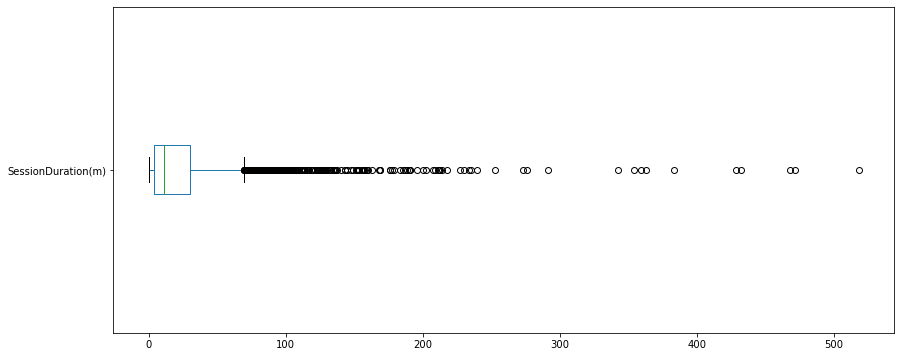

In [52]:
dfresult['SessionDuration(m)'].plot(kind='box', vert=False, figsize=(14,6));

In [44]:
dfresult['Item1'].value_counts()

496141      5
5441        5
101409      4
34366       4
67415       4
8561        4
1649739     4
396671      4
8274408     4
50228       4
4680452     3
1012409     3
42792       3
1668389     3
2053822     3
37554       3
324716      3
105118      3
10452962    3
1824277     3
2547593     3
922481      3
49759       3
12688       3
43099       3
156222      3
3175626     3
2812962     3
12086       3
2731370     3
110635      3
5594652     3
3060180     3
5724812     3
1711835     3
1345387     2
2662486     2
42746       2
100667      2
9004230     2
4454424     2
477836      2
52297       2
1495645     2
104656      2
120776      2
585431      2
70508       2
7127542     2
322071      2
149619      2
1472445     2
95838       2
1762715     2
128476      2
2088146     2
114338      2
48521       2
8289        2
2033173     2
4560832     2
6541        2
155753      2
503361      2
1455251     2
54803       2
44292       2
6469708     2
2684345     2
102080      2
8276346     2
83792 

In [39]:
df.head(100)

,user_id,session_id,timestamp,step,action_type,reference,platform,device,current_filters,impressions,prices,Country,City
0,00RL8Z82B2Z1,aff3928535f48,2018-11-01 01:57:40,1,search for poi,Newtown,AU,mobile,NaN,NaN,NaN,Australia,Sydney
1,00RL8Z82B2Z1,aff3928535f48,2018-11-01 01:58:42,2,interaction item image,666856,AU,mobile,NaN,NaN,NaN,Australia,Sydney
2,00RL8Z82B2Z1,aff3928535f48,2018-11-01 01:58:42,3,interaction item image,666856,AU,mobile,NaN,NaN,NaN,Australia,Sydney
3,00RL8Z82B2Z1,aff3928535f48,2018-11-01 01:58:52,4,interaction item image,666856,AU,mobile,NaN,NaN,NaN,Australia,Sydney
4,00RL8Z82B2Z1,aff3928535f48,2018-11-01 01:58:52,5,interaction item image,109038,AU,mobile,NaN,NaN,NaN,Australia,Sydney
5,00RL8Z82B2Z1,aff3928535f48,2018-11-01 01:58:52,6,interaction item image,666856,AU,mobile,NaN,NaN,NaN,Australia,Sydney
6,00RL8Z82B2Z1,aff3928535f48,2018-11-01 01:58:52,7,interaction item image,109038,AU,mobile,NaN,NaN,NaN,Australia,Sydney
7,00RL8Z82B2Z1,aff3928535f48,2018-11-01 01:58:52,8,interaction item image,666856,AU,mobile,NaN,NaN,NaN,Australia,Sydney
8,00RL8Z82B2Z1,aff3928535f48,2018-11-01 01:59:02,9,interaction item image,109038,AU,mobile,NaN,NaN,NaN,Australia,Sydney
9,00RL8Z82B2Z1,aff3928535f48,2018-11-01 01:59:02,10,interaction item image,109038,AU,mobile,NaN,NaN,NaN,Australia,Sydney


In [47]:
df.loc[df['action_type'] == 'clickout item']['reference'].value_counts().loc[lambda x: x>100]

8796        822
8561        763
8621        726
8589        652
1455251     648
8586        634
8618        627
9773310     554
100227      539
8805412     525
1811137     520
8588        516
8564        504
8551        478
948643      444
103452      436
4638392     435
1649739     424
103600      419
44208       406
499361      395
2053822     392
102080      384
7751220     372
34366       372
8640        369
2784325     366
2165594     362
8577        360
664366      354
14243       352
8595        346
67445       346
34429       346
8568        345
3921330     342
1063032     340
103557      340
473691      335
503361      335
104802      333
106481      329
42378       328
2450306     321
1810141     317
921237      317
3818266     316
3148916     316
3248926     313
4467826     312
3247218     311
1127559     310
496141      308
891093      305
2884070     303
4290518     300
103498      299
8744        299
100224      297
42276       293
894539      292
6163642     292
2759718 